In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [27]:
def process_df(df):
    df_clean = df[df['train_error'] > 0.0]
    t_start = np.min(df_clean['wall_time'])
    df_clean['wall_time'] = df_clean['wall_time'] - t_start
    return df_clean

In [30]:
def plot_mach(df):
    fig, axes = plt.subplots(2, 2, figsize=(20,15))

    ### Time vs. DUAL
    this_ax = axes[0][0]
    for num_mach in sorted(df.keys()):
        this_df = process_df(df[num_mach])
        this_ax.plot(this_df['wall_time'], this_df['dual'], 'x-', label='# Machines = %d' % num_mach)
    this_ax.set_yscale('log')
    # this_ax.set_ylim(ymin=0.0, ymax=1.1)
    this_ax.grid(b=True, which='both',axis='both')
    this_ax.set_xlabel('Time (secs)')
    this_ax.set_ylabel('Duality gap')
    this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
    this_ax.set_title("Dual vs. Time")

    ### Time vs. Primal
    this_ax = axes[0][1]
    for num_mach in sorted(df.keys()):
        this_df = process_df(df[num_mach])
        this_ax.plot(this_df['wall_time'], this_df['primal'], 'x-', label='# Machines = %d' % num_mach)
    this_ax.set_yscale('log')
    # this_ax.set_ylim(ymin=0.0, ymax=1.1)
    this_ax.grid(b=True, which='both',axis='both')
    this_ax.set_xlabel('Time (secs)')
    this_ax.set_ylabel('Primal')
    this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
    this_ax.set_title("Primal vs. Time")

    ### Time vs. Gap
    this_ax = axes[1][0]
    for num_mach in sorted(df.keys()):
        this_df = process_df(df[num_mach])
        this_ax.plot(this_df['wall_time'], this_df['gap'], 'x-', label='# Machines = %d' % num_mach)
    this_ax.set_yscale('log')
    # this_ax.set_ylim(ymin=0.0, ymax=1.1)
    this_ax.grid(b=True, which='both',axis='both')
    this_ax.set_xlabel('Time (secs)')
    this_ax.set_ylabel('Duality gap')
    this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
    this_ax.set_title("Gap vs. Time")

    ### Time vs. Train Error
    this_ax = axes[1][1]
    for num_mach in sorted(df.keys()):
        this_df = process_df(df[num_mach])
        this_ax.plot(this_df['wall_time'], this_df['train_error'], 'x-', label='# Machines = %d' % num_mach)
    # this_ax.set_xscale('log')
    # this_ax.set_ylim(ymin=0.0, ymax=1.1)
    # this_ax.set_xlim(xmin=1.0)
    this_ax.grid(b=True, which='both',axis='both')
    this_ax.set_xlabel('Time (secs)')
    this_ax.set_ylabel('Train Error')
    this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
    this_ax.set_title("Train Error vs. Time")

# Speed- up

**Idea**  
Fixed workload, increase number of machines.  
In this case, fixed workload = one pass of dataset before communication.

## Fixed no. of partitions

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


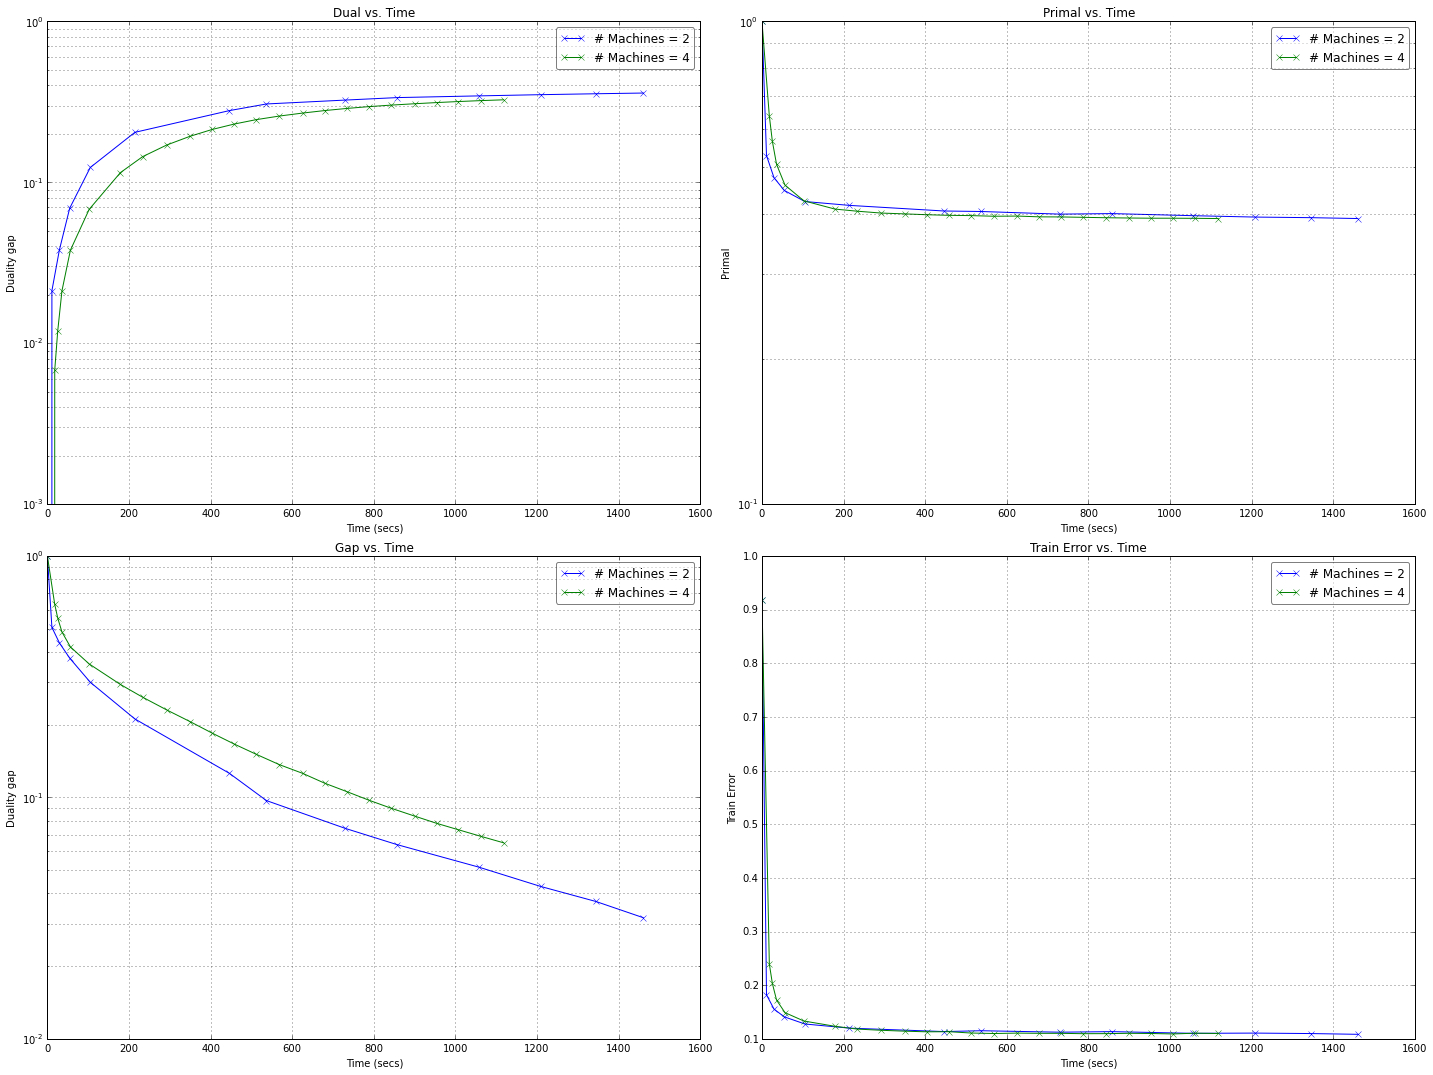

In [31]:
df = {}

df[2] = read_csv('../2016-01-28/2m/1454008294-chain-2m_speedup_const16-parts_4-frac_1.000000.csv', comment='#')
df[4] = read_csv('../2016-01-28/4m/1454012347-chain-4m_speedup_const16-parts_16-frac_1.000000.csv', comment='#')

plot_mach(df)

plt.tight_layout()
plt.show()

## 2 Partitions per machine

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


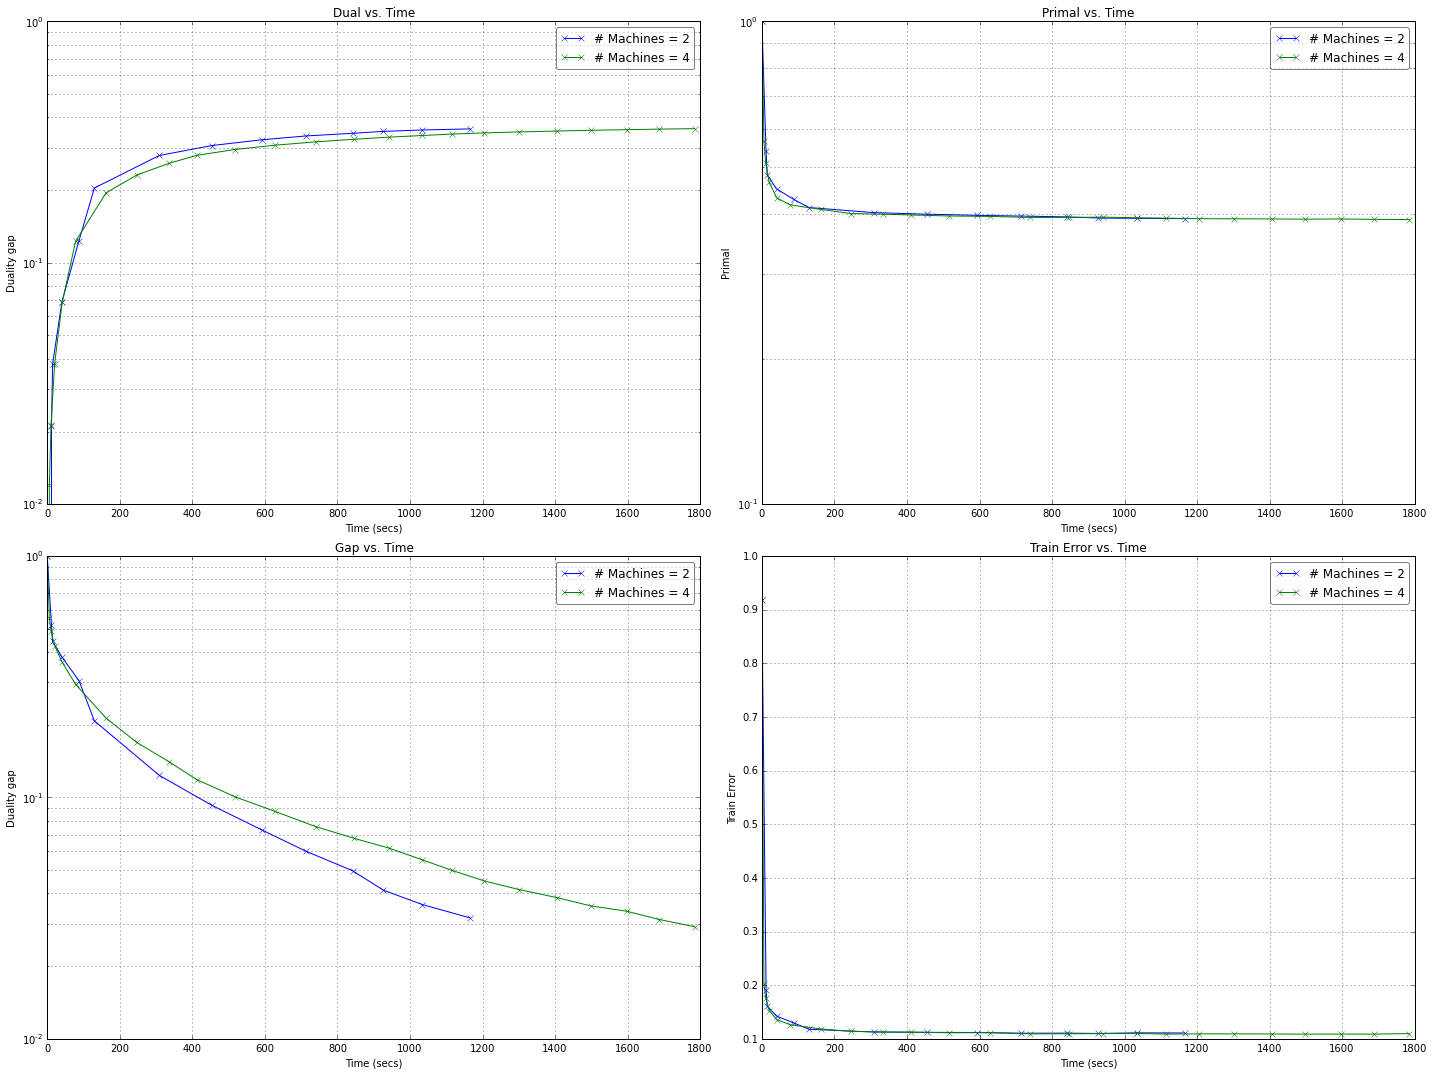

In [32]:
df = {}

df[2] = read_csv('../2016-01-28/2m/1454007068-chain-2m_speedup_vary-parts_4-frac_1.000000.csv', comment='#')
df[4] = read_csv('../2016-01-28/4m/1454010445-chain-4m_speedup_vary-parts_8-frac_1.000000.csv', comment='#')

plot_mach(df)

plt.tight_layout()
plt.show()

# Scale-up

**Idea**  
Increase workload when scaling.  
In this case, workload per machine = Each machine samples 10% of dataset (0.1 pass) before communication

## Fixed partitions per machine

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


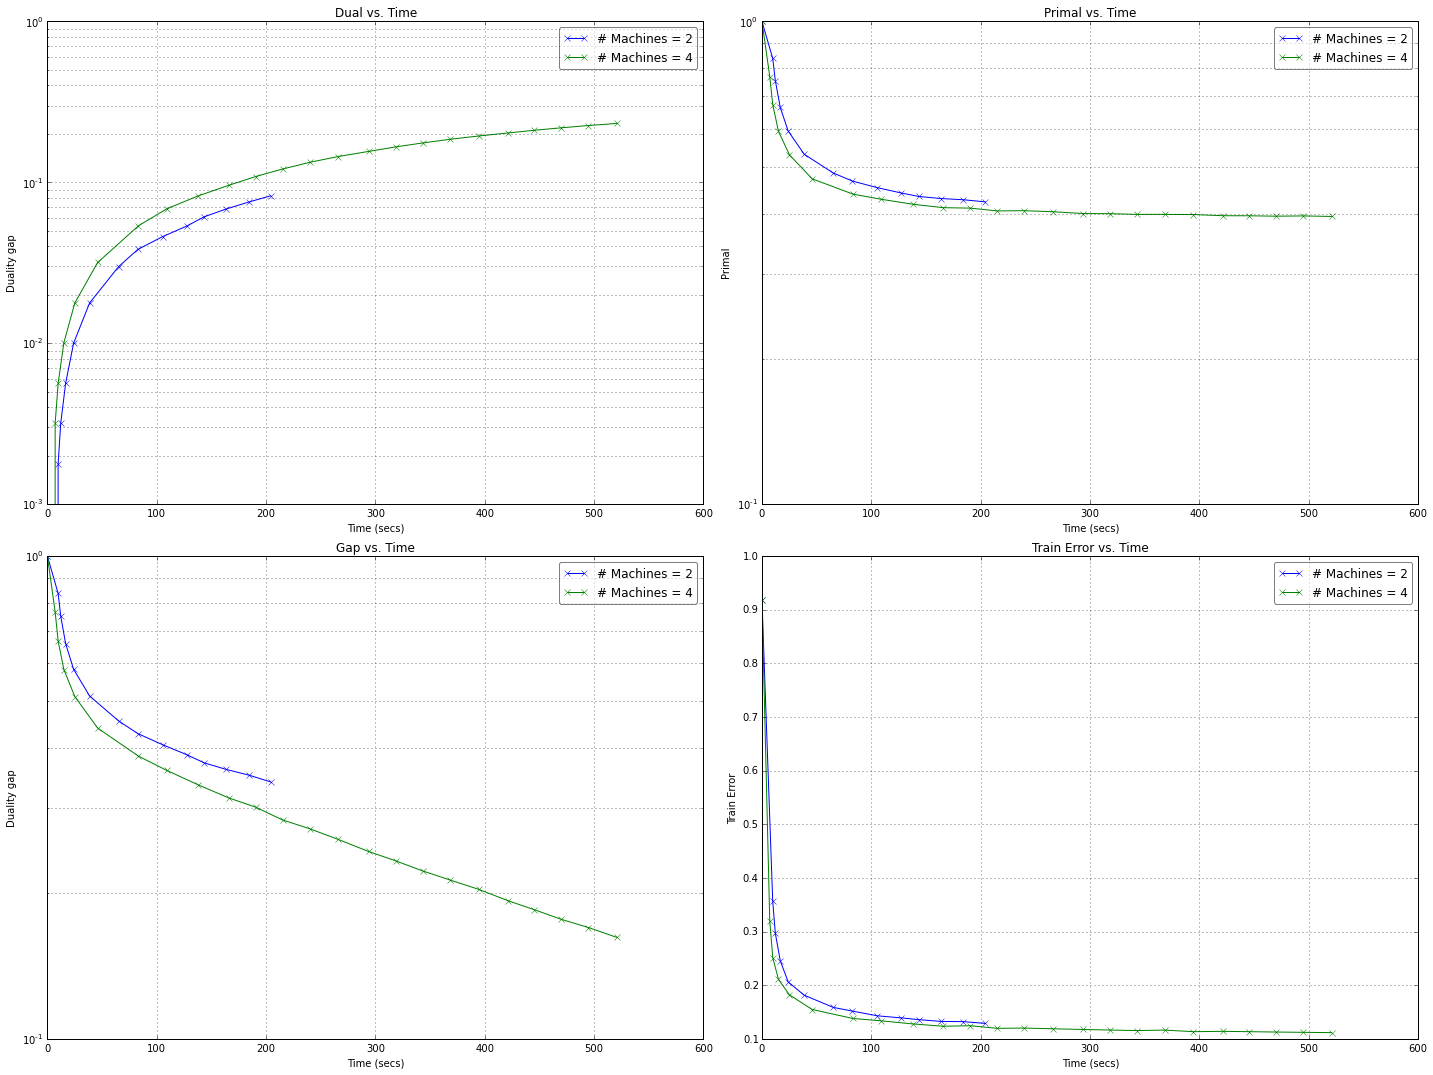

In [33]:
df = {}

df[2] = read_csv('../2016-01-28/2m/1454010348-chain-2m_scaleup_const16-parts_16-frac_0.200000.csv', comment='#')
df[4] = read_csv('../2016-01-28/4m/1454014410-chain-4m_scaleup_const16-parts_16-frac_0.400000.csv', comment='#')

plot_mach(df)

plt.tight_layout()
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


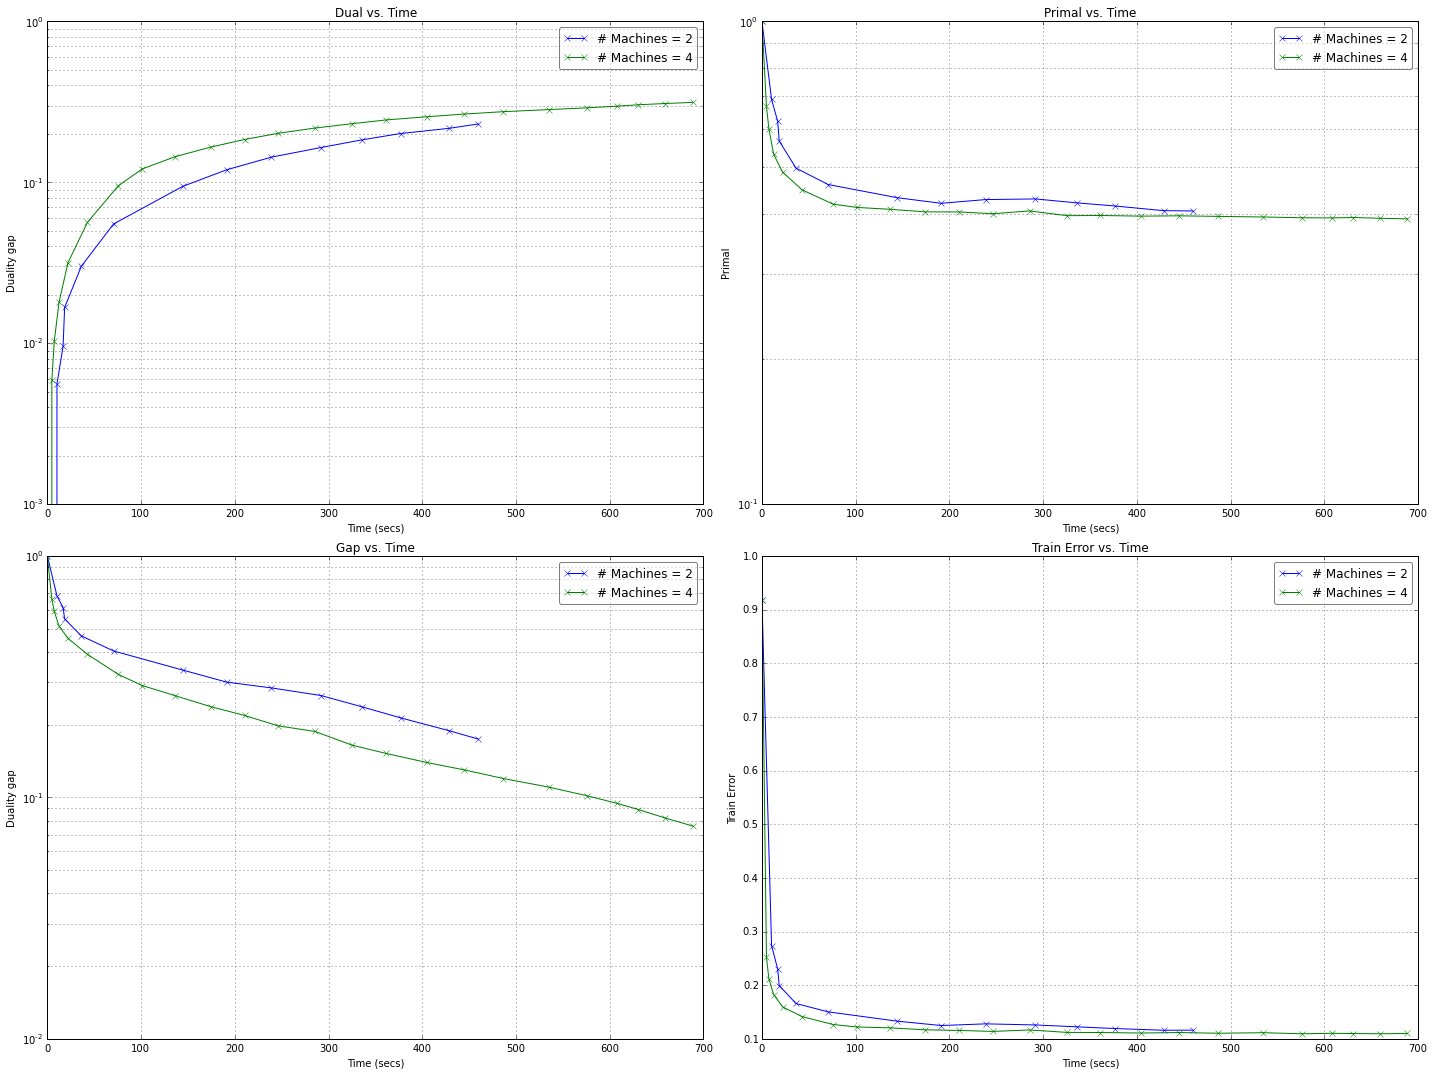

In [34]:
df = {}

df[2] = read_csv('../2016-01-28/2m/1454009825-chain-2m_scaleup_vary-parts_4-frac_0.200000.csv', comment='#')
df[4] = read_csv('../2016-01-28/4m/1454013627-chain-4m_scaleup_vary-parts_8-frac_0.400000.csv', comment='#')

plot_mach(df)

plt.tight_layout()
plt.show()